<a href="https://colab.research.google.com/github/sahil13kumar/Machine-Learning/blob/master/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
import re
import urllib3
from datetime import datetime
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
import sys

if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    # Not Python 3 - today, it is most likely to be Python 2
    # But note that this might need an update when Python 4
    # might be around one day
    from urllib import urlopen


# Your code where you can use urlopen
with urlopen("http://www.python.org") as url:
    s = url.read()

print(s)

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Ha

In [0]:
# with urlopen("http://www.python.org") as htmlpage:
#   lst = []
#   for line in htmlpage:
#     line = line.rstrip()
#     if re.search('history geworkomethods_table_wrap pdtrow', line) :
#         lst.append(line)

In [0]:
url = 'https://www.ifcmarkets.co.in/en/market-data/commodities-prices/cotton' 
r = requests.get(url)
HCE = BeautifulSoup(r.content)
type(HCE)

bs4.BeautifulSoup

In [0]:
table=HCE.find('table', {'class', 'history geworkomethods_table_wrap pdtrow'})

In [0]:
print(table)

<table class="history geworkomethods_table_wrap pdtrow"><thead><tr><th>Date</th><th>Open price</th><th>High</th><th>Low</th><th>Close price</th><th>Change %</th></tr></thead><tbody><tr><td>2020-01-08</td><td>70.04</td><td>70.45</td><td>69.52</td><td class="to_up">70.45</td><td class="change"><span class="to_up"><span class="ifcm-arrow-bottom"></span>
0.27 </span></td></tr><tr><td>2020-01-07</td><td>70.46</td><td>70.61</td><td>69.91</td><td class="to_down">70.26</td><td class="change"><span class="to_down"><span class="ifcm-arrow-bottom"></span>
0.28  </span></td></tr><tr><td>2020-01-06</td><td>69.73</td><td>70.48</td><td>69.73</td><td class="to_up">70.45</td><td class="change"><span class="to_up"><span class="ifcm-arrow-bottom"></span>
1.18 </span></td></tr><tr><td>2020-01-03</td><td>69.51</td><td>69.99</td><td>68.91</td><td class="to_up">69.62</td><td class="change"><span class="to_up"><span class="ifcm-arrow-bottom"></span>
0.05 </span></td></tr><tr><td>2020-01-02</td><td>69.69</td><

In [0]:
headers= [header.text for header in table.find_all('th')]

In [0]:
headers

['Date', 'Open price', 'High', 'Low', 'Close price', 'Change %']

In [0]:
rows = []
for row in table.find_all('tr'):
    rows.append([val.text.encode('utf-8').decode('utf-8') for val in row.find_all('td')])

In [0]:
df2 = pd.DataFrame(rows, columns=headers)

In [0]:
df2

,Date,Open price,High,Low,Close price,Change %
0,None,None,None,None,None,None
1,2020-01-08,70.04,70.45,69.52,70.45,\n0.27
2,2020-01-07,70.46,70.61,69.91,70.26,\n0.28
3,2020-01-06,69.73,70.48,69.73,70.45,\n1.18
4,2020-01-03,69.51,69.99,68.91,69.62,\n0.05
5,2020-01-02,69.69,70.10,69.40,69.59,\n0.23
6,2019-12-31,69.84,69.97,69.55,69.75,\n0.29
7,2019-12-30,69.27,70.03,69.27,69.95,\n1.28
8,2019-12-27,69.12,69.58,68.75,69.06,\n0.12
9,2019-12-24,68.72,68.99,68.47,68.98,\n0.38


In [0]:
p = df2['Date'][6]

In [0]:
p

<td>2019-12-31</td>

In [0]:
p1 = p.text.encode('utf-8').decode('utf-8')

In [0]:
type(p1)

str

In [0]:
def preproc(dat):
    dat.dropna(axis=0, how='all', inplace=True)
    dat.columns = dat.columns.str.replace("\n", "")    
    dat.replace(["\n"], [""], regex=True, inplace=True)
    dat.replace([","], [""], regex=True, inplace=True)
    dat.replace(r"\b[a-zA-Z]\b", np.nan, regex=True, inplace=True)
    dat = dat.apply(pd.to_numeric, errors='ignore')    
    return(dat)

In [0]:
df3 = preproc(df2)

In [0]:
df3

,Date,Open price,High,Low,Close price,Change %
1,2020-01-08,70.04,70.45,69.52,70.45,0.27
2,2020-01-07,70.46,70.61,69.91,70.26,0.28
3,2020-01-06,69.73,70.48,69.73,70.45,1.18
4,2020-01-03,69.51,69.99,68.91,69.62,0.05
5,2020-01-02,69.69,70.10,69.40,69.59,0.23
6,2019-12-31,69.84,69.97,69.55,69.75,0.29
7,2019-12-30,69.27,70.03,69.27,69.95,1.28
8,2019-12-27,69.12,69.58,68.75,69.06,0.12
9,2019-12-24,68.72,68.99,68.47,68.98,0.38
10,2019-12-23,68.14,68.95,67.83,68.72,0.89


In [0]:
df3 = df3.iloc[::-1]

In [0]:
df3.head()

,Date,Open price,High,Low,Close price,Change %
19,2019-12-10,65.69,66.30,64.95,65.99,0.70
18,2019-12-11,65.91,66.27,65.44,65.96,0.05
17,2019-12-12,65.93,67.45,65.68,67.28,1.97
16,2019-12-13,67.35,67.88,66.54,66.86,0.63
15,2019-12-16,66.97,67.59,66.61,67.15,0.44


In [0]:
X = df3[['Open price','High','Low','Close price']]
Y = df3['Change %']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

In [0]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [0]:
y_pred

array([1.60410166, 0.32910097, 0.43346732, 0.35270683, 0.0697314 ,
       0.90891843, 0.43968875])

In [0]:
y_test

17    1.97
18    0.05
8     0.12
9     0.38
14    0.77
7     1.28
1     0.27
Name: Change %, dtype: float64

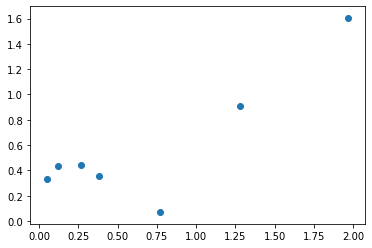

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [0]:
df1['Close price'].plot.line

<bound method PlotAccessor.line of <pandas.plotting._core.PlotAccessor object at 0x7f2c4547e630>>

In [0]:
import matplotlib.pyplot as plt

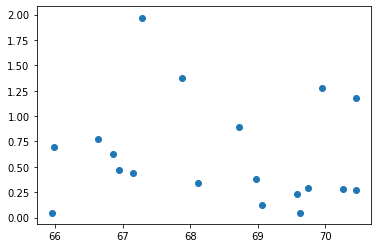

In [0]:
plt.scatter(df1['Close price'],df1['Change %'])

In [0]:
X1 = df3[['Open price','High','Low']]
Y1 = df3['Close price']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.33,random_state=5)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [0]:
y_pred

array([67.20105121, 65.80124928, 69.23816708, 68.70284048, 66.72035615,
       69.9437411 , 70.02708389])

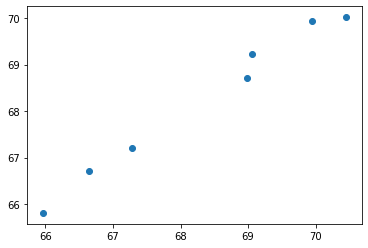

In [0]:
plt.scatter(y_test,y_pred)